# 1. Preparação do ambiente e carregamendo dos dados

In [371]:
# Bloco Inicial para Notebook carregado no Kaggle
# Carregamento dos pacotes que serão utilizados

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# pd.options.mode.chained_assignment = None
# pd.set_option('display.max_rows', 8000)
# import matplotlib.pyplot as plt
# from sklearn import preprocessing
# from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeClassifier

# Código de utilização no kaggle para upload dos dados
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# Carregamento do dataset completo
# df_exoplanets_full = pd.read_csv('/kaggle/input/exoplanet-full-data-set-july-2022/dataset_exoplanets_29.07.2022_ready.csv')
# print('Carregado o arquivo: dataset_exoplanets_29.07.2022_ready.csv')
# print('Carregamento completo. A dimensão do dataset completo é ' + str(df_exoplanets_full.shape))

In [372]:
# Bloco Inicial para Notebook carregado localmente

# Carregamento dos pacotes que serão utilizados
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
pd.set_option('display.max_rows', 8000)
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Carregamento do dataset completo
df_exoplanets_full = pd.read_csv('dataset_exoplanets_29.07.2022_ready.csv')
print('Carregado o arquivo: dataset_exoplanets_29.07.2022_ready.csv')
print('Carregamento completo. A dimensão do dataset completo é ' + str(df_exoplanets_full.shape))

Carregado o arquivo: dataset_exoplanets_29.07.2022_ready.csv
Carregamento completo. A dimensão do dataset completo é (9564, 141)


----------------------------------------------------------------------------------------------------------------------------------------------

# 2. Seleção de dados e Montagem do dataset para treinanamento

In [373]:
# Criação do dataset de dados - realizando o drop dos atributos que não serão utilizados no treinamento
# Atributos retirados da tabela incluem valores de erros dos instrumentos de medidas e datas irrelevantes
df_exoplanets_data = df_exoplanets_full.copy()
df_exoplanets_data.drop(columns=['koi_pdisposition','koi_vet_stat','koi_vet_date','koi_disp_prov','koi_comment','koi_period_err1',
                                'koi_period_err2','koi_time0bk','koi_time0bk_err1','koi_time0bk_err2','koi_time0','koi_time0_err1',
                                'koi_time0_err2','koi_eccen_err1','koi_eccen_err2','koi_longp_err1','koi_longp_err2','koi_impact_err1',
                                'koi_impact_err2','koi_duration_err1','koi_duration_err2','koi_ingress_err1','koi_ingress_err2',
                                'koi_depth_err1','koi_depth_err2','koi_ror_err1','koi_ror_err2','koi_srho_err1','koi_srho_err2',
                                'koi_fittype','koi_prad_err1','koi_prad_err2','koi_sma_err1','koi_sma_err2','koi_incl_err1',
                                'koi_incl_err2','koi_teq_err1','koi_teq_err2','koi_insol','koi_insol_err1','koi_insol_err2',
                                'koi_dor','koi_dor_err1','koi_dor_err2','koi_limbdark_mod','koi_parm_prov','koi_tce_plnt_num',
                                'koi_tce_delivname','koi_quarters','koi_bin_oedp_sig','koi_trans_mod','koi_model_dof','koi_model_chisq',
                                'koi_datalink_dvr','koi_datalink_dvs','koi_steff_err1','koi_steff_err2','koi_slogg_err1','koi_slogg_err2',
                                'koi_smet_err1','koi_smet_err2','koi_srad_err1','koi_srad_err2','koi_smass_err1','koi_smass_err2','koi_sage_err1',
                                'koi_sage_err2','koi_sparprov','koi_fwm_stat_sig','koi_fwm_sra','koi_fwm_sra_err','koi_fwm_sdec',
                                'koi_fwm_sdec_err','koi_fwm_srao','koi_fwm_srao_err','koi_fwm_sdeco','koi_fwm_sdeco_err','koi_fwm_prao',
                                'koi_fwm_prao_err','koi_fwm_pdeco','koi_fwm_pdeco_err','koi_dicco_mra','koi_dicco_mra_err','koi_dicco_mdec',
                                'koi_dicco_mdec_err','koi_dicco_msky','koi_dicco_msky_err','koi_dikco_mra','koi_dikco_mra_err',
                                'koi_dikco_mdec','koi_dikco_mdec_err','koi_dikco_msky','koi_dikco_msky_err'],axis=1,inplace=True)

print('O shape do dataset df_exoplanets_data é ' + str(df_exoplanets_data.shape))
print('Total de colunas excluídas: ' + str(df_exoplanets_full.shape[1]-df_exoplanets_data.shape[1]))

O shape do dataset df_exoplanets_data é (9564, 48)
Total de colunas excluídas: 93


In [374]:
# Foi verificado que os atributos 'koi_eccen','koi_longp','koi_ingress','koi_ldm_coeff3','koi_ldm_coeff4','koi_sage' apresentam APENAS valores zeros ou nulos.
# Esses atributos foram retirados pois não inserem informação ao modelo
print(df_exoplanets_data[['koi_eccen','koi_longp','koi_ingress','koi_ldm_coeff3','koi_ldm_coeff4','koi_sage']].describe())
df_exoplanets_data.drop(['koi_eccen','koi_longp','koi_ingress','koi_ldm_coeff3','koi_ldm_coeff4','koi_sage'],axis=1,inplace=True)
print('O shape do dataset df_exoplanets_data é ' + str(df_exoplanets_data.shape))

       koi_eccen  koi_longp  koi_ingress  koi_ldm_coeff3  koi_ldm_coeff4  \
count     9201.0        0.0          0.0          9201.0          9201.0   
mean         0.0        NaN          NaN             0.0             0.0   
std          0.0        NaN          NaN             0.0             0.0   
min          0.0        NaN          NaN             0.0             0.0   
25%          0.0        NaN          NaN             0.0             0.0   
50%          0.0        NaN          NaN             0.0             0.0   
75%          0.0        NaN          NaN             0.0             0.0   
max          0.0        NaN          NaN             0.0             0.0   

       koi_sage  
count       0.0  
mean        NaN  
std         NaN  
min         NaN  
25%         NaN  
50%         NaN  
75%         NaN  
max         NaN  
O shape do dataset df_exoplanets_data é (9564, 42)


In [375]:
# Atributos irrelevantes - 'rowid', 'kepid', 'kepoi_name', 'kepler_name'
# Esses atributos são de identificação e não representam informação no modelo
df_exoplanets_data.drop(['rowid', 'kepid', 'kepoi_name', 'kepler_name'],axis=1,inplace=True)
print('O shape do dataset df_exoplanets_data é ' + str(df_exoplanets_data.shape))

O shape do dataset df_exoplanets_data é (9564, 38)


In [376]:
# O atributo koi_disposition é o target
# Ele apresenta 3 possibilidades: FALSE POSITIVE, CONFIRMED e CANDIDATE. 
#- FALSE POSITIVE - Confirmado por outros métodos que 
#- CONFIRMED - Confirmado como exoplaneta
#- CANDIDATE - Ainda em avaliação

# A base será separada em dois conjuntos:
#- FALSE POSITIVE + CONFIRMED
#- CANDIDATE

# A primeira base será utilizada para treinamento e teste 
# A base de candidatos poderá ser utlizada para verificação de quais objetos de interesse seriam confirmados como planetas utilizando o modelo

df_exoplanets_candidates = df_exoplanets_data.loc[df_exoplanets_data['koi_disposition']=='CANDIDATE']
df_exoplanets = df_exoplanets_data.loc[df_exoplanets_data['koi_disposition']!='CANDIDATE']

print('O shape do dataset df_exoplanets_candidates é ' + str(df_exoplanets_candidates.shape))
print('O shape do dataset df_exoplanets é ' + str(df_exoplanets.shape))

O shape do dataset df_exoplanets_candidates é (2056, 38)
O shape do dataset df_exoplanets é (7508, 38)


In [377]:
# Existem 38 atributos selecionados do dataset original - foi criado listas das categorias desses atributos para utilização futura
#df_exoplanets.columns
exoplanet_archive_information = ['koi_disposition']
project_disposition_columns = ['koi_score','koi_fpflag_nt', 'koi_fpflag_ss','koi_fpflag_co', 'koi_fpflag_ec']
transit_properties = ['koi_period', 'koi_impact', 'koi_duration', 'koi_depth', 'koi_ror', 'koi_srho', 'koi_prad', 'koi_sma', 'koi_incl', 'koi_teq', 'koi_ldm_coeff2', 'koi_ldm_coeff1']
tce_event_information = ['koi_max_sngle_ev', 'koi_max_mult_ev', 'koi_model_snr', 'koi_count', 'koi_num_transits']
stellar_parameters = ['koi_steff', 'koi_slogg', 'koi_smet', 'koi_srad', 'koi_smass']
kic_parameters = ['ra', 'dec', 'koi_kepmag', 'koi_gmag', 'koi_rmag', 'koi_imag', 'koi_zmag', 'koi_jmag', 'koi_hmag', 'koi_kmag']
categories = [exoplanet_archive_information, project_disposition_columns, transit_properties, tce_event_information, stellar_parameters, kic_parameters]

----------------------------------------------------------------------------------------------------------------------------------------------

# 3. Pré-Processamento, Análise Preliminar de Outliers e Dados Nulos/Vazios

### 3.1 Análise de Balanceamento do dataset

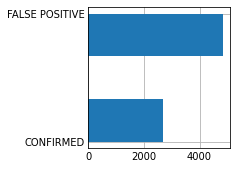

Base Balanceada. Aproximadamente relação de 1:2 - CONFIRMADO/FALSO POSITIVO


In [378]:
#Avaliando o balanceamento da base de dados
plt.style.use('_mpl-gallery')
df_exoplanets.koi_disposition.hist(bins=3, orientation = 'horizontal')
plt.show()
print('Base Balanceada. Aproximadamente relação de 1:2 - CONFIRMADO/FALSO POSITIVO')

### 3.2 Análise de Dados Nulos e/ou Vazios e Análise Preliminar de Outliers

In [379]:
# Necessário preencher os valores Nulos no atributos ou verificar se existe relevancia nele.
df_exoplanets.isna().any()

koi_disposition     False
koi_score            True
koi_fpflag_nt       False
koi_fpflag_ss       False
koi_fpflag_co       False
koi_fpflag_ec       False
koi_period          False
koi_impact           True
koi_duration        False
koi_depth            True
koi_ror              True
koi_srho             True
koi_prad             True
koi_sma              True
koi_incl             True
koi_teq              True
koi_ldm_coeff2       True
koi_ldm_coeff1       True
koi_max_sngle_ev     True
koi_max_mult_ev      True
koi_model_snr        True
koi_count           False
koi_num_transits     True
koi_steff            True
koi_slogg            True
koi_smet             True
koi_srad             True
koi_smass            True
ra                  False
dec                 False
koi_kepmag           True
koi_gmag             True
koi_rmag             True
koi_imag             True
koi_zmag             True
koi_jmag             True
koi_hmag             True
koi_kmag             True
dtype: bool

In [380]:
#Atributo koi_score
print(df_exoplanets.koi_score.isna().sum()) #Somatorio de valores nulos
print(df_exoplanets.koi_score.describe())
#Como o koi_score é a confiança em relação a classe do registro. Preenchimento dos valores nulos será de acordo com o pior caso. Substituição de NULO por ZERO
df_exoplanets.koi_score.fillna(0,inplace=True)
print(df_exoplanets.koi_score.isna().sum()) #Somatorio de valores nulos



910
count    6598.000000
mean        0.410274
std         0.478320
min         0.000000
25%         0.000000
50%         0.000000
75%         0.998000
max         1.000000
Name: koi_score, dtype: float64
0


count    7250.000000
mean        0.758169
std         3.212828
min         0.000000
25%         0.227000
50%         0.586000
75%         0.917675
max       100.806000
Name: koi_impact, dtype: float64
Valores NULOS: 258


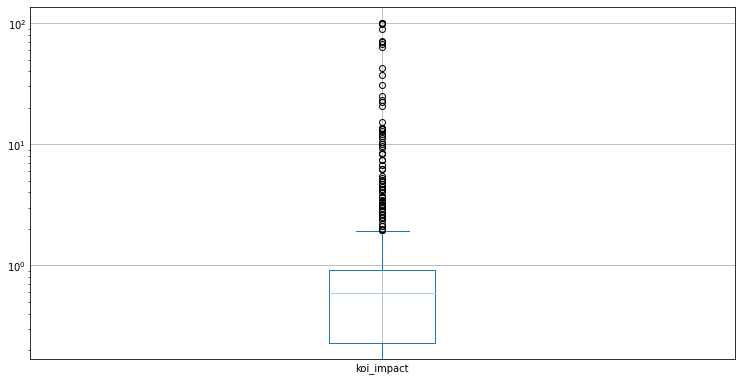

Valores NULOS: 0


In [381]:
# Atributo koi_impact com valores Outliers
print(df_exoplanets.koi_impact.describe())
print('Valores NULOS: ' + str(df_exoplanets.koi_impact.isna().sum()))
df_exoplanets.koi_impact.plot(kind='box',figsize=(10,5),logy=True)
plt.show()
# Inseridos Valores Médios
df_exoplanets.koi_impact.fillna(df_exoplanets.koi_impact.mean(), inplace=True)
print('Valores NULOS: ' + str(df_exoplanets.koi_impact.isna().sum()))
# Outliers mantidos por terem significado


count    7.250000e+03
mean     2.983129e+04
std      9.159879e+04
min      8.000000e-01
25%      1.826500e+02
50%      5.029500e+02
75%      2.380600e+03
max      1.541400e+06
Name: koi_depth, dtype: float64
Valores NULOS: 258


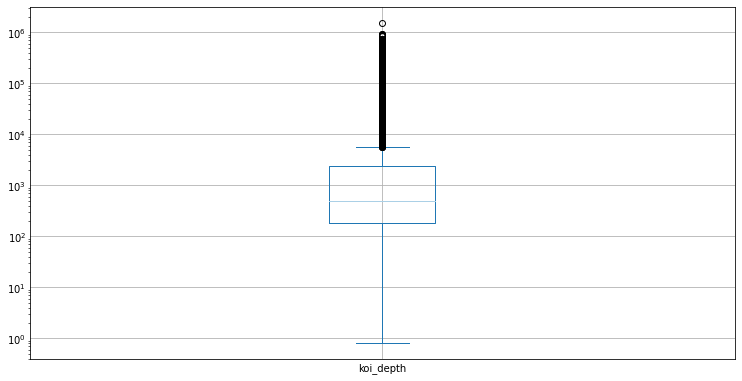

Valores NULOS: 0


In [382]:
# Atributo koi_depth com valores Outliers
print(df_exoplanets.koi_depth.describe())
print('Valores NULOS: ' + str(df_exoplanets.koi_depth.isna().sum()))
df_exoplanets.koi_depth.plot(kind='box',figsize=(10,5),logy=True)
plt.show()
# Inseridos Valores Médios
df_exoplanets.koi_depth.fillna(df_exoplanets.koi_depth.mean(), inplace=True)
print('Valores NULOS: ' + str(df_exoplanets.koi_depth.isna().sum()))
# Outliers mantidos por terem significado

count    7250.000000
mean        0.296041
std         3.171768
min         0.001289
25%         0.013230
50%         0.023904
75%         0.200595
max        99.870651
Name: koi_ror, dtype: float64
Valores NULOS: 258


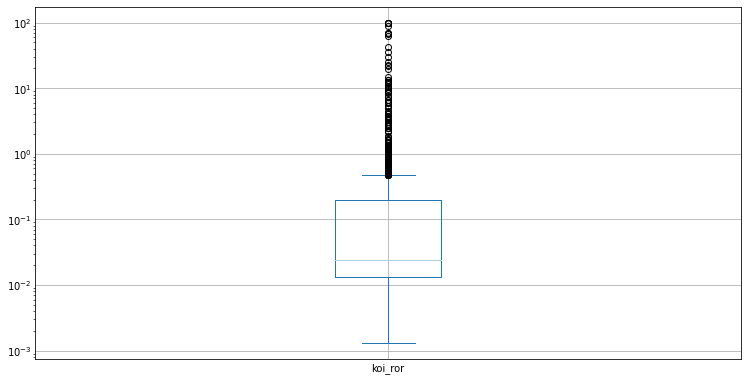

Valores NULOS: 0


In [383]:
# Atributo koi_ror com valores Outliers
print(df_exoplanets.koi_ror.describe())
print('Valores NULOS: ' + str(df_exoplanets.koi_ror.isna().sum()))
df_exoplanets.koi_ror.plot(kind='box',figsize=(10,5),logy=True)
plt.show()
# Inseridos Valores Médios
df_exoplanets.koi_ror.fillna(df_exoplanets.koi_ror.mean(), inplace=True)
print('Valores NULOS: ' + str(df_exoplanets.koi_ror.isna().sum()))
# Outliers mantidos por terem significado

count    7289.000000
mean        7.007737
std        48.515264
min         0.000040
25%         0.182620
50%         0.787840
75%         2.438100
max       980.854190
Name: koi_srho, dtype: float64
Valores NULOS: 219


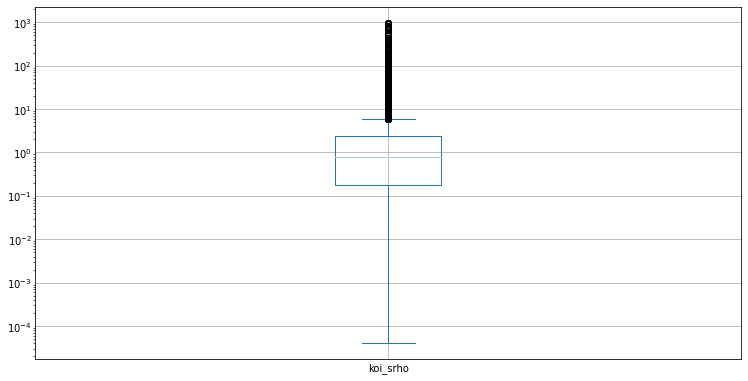

Valores NULOS: 0


In [384]:
# Atributo koi_srho com valores Outliers
print(df_exoplanets.koi_srho.describe())
print('Valores NULOS: ' + str(df_exoplanets.koi_srho.isna().sum()))
df_exoplanets.koi_srho.plot(kind='box',figsize=(10,5),logy=True)
plt.show()
# Inseridos Valores Médios
df_exoplanets.koi_srho.fillna(df_exoplanets.koi_srho.mean(), inplace=True)
print('Valores NULOS: ' + str(df_exoplanets.koi_srho.isna().sum()))
# Outliers mantidos por terem significado

#### Atributo koi_prad
#### Atributos com valores Outliers - Necessário tratamento

count      7250.000000
mean        105.221029
std        3197.095714
min           0.080000
25%           1.500000
50%           2.630000
75%          24.635000
max      200346.000000
Name: koi_prad, dtype: float64
Valores NULOS: 258


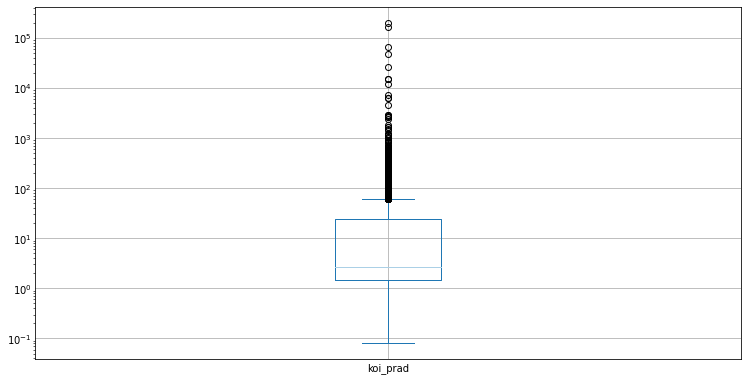

Valores NULOS: 0


In [385]:
# Atributo koi_prad com valores Outliers
print(df_exoplanets.koi_prad.describe())
print('Valores NULOS: ' + str(df_exoplanets.koi_prad.isna().sum()))
df_exoplanets.koi_prad.plot(kind='box',figsize=(10,5),logy=True)
plt.show()
# Inseridos Valores Médios
df_exoplanets.koi_prad.fillna(df_exoplanets.koi_prad.mean(), inplace=True)
print('Valores NULOS: ' + str(df_exoplanets.koi_prad.isna().sum()))
# Outliers mantidos por terem significado

count    7250.000000
mean        0.190404
std         0.291851
min         0.005900
25%         0.033100
50%         0.075400
75%         0.177275
max         2.152500
Name: koi_sma, dtype: float64
Valores NULOS: 258


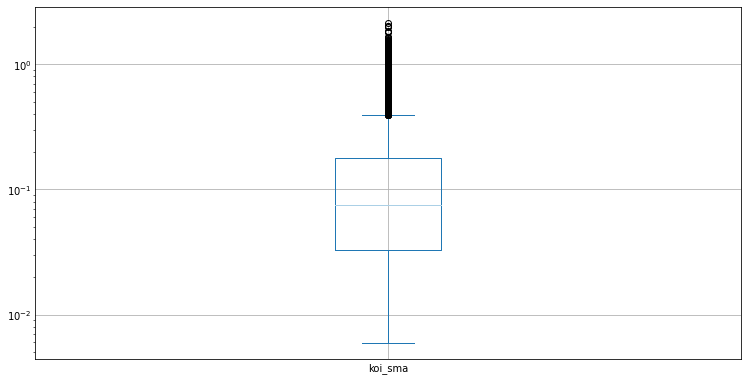

Valores NULOS: 0


In [386]:
# Atributo koi_sma com valores Outliers
print(df_exoplanets.koi_sma.describe())
print('Valores NULOS: ' + str(df_exoplanets.koi_sma.isna().sum()))
df_exoplanets.koi_sma.plot(kind='box',figsize=(10,5),logy=True)
plt.show()
# Inseridos Valores Médios
df_exoplanets.koi_sma.fillna(df_exoplanets.koi_sma.mean(), inplace=True)
print('Valores NULOS: ' + str(df_exoplanets.koi_sma.isna().sum()))
# Outliers mantidos por terem significado

count    7249.000000
mean       81.166869
std        16.459865
min         2.290000
25%        81.960000
50%        88.010000
75%        89.640000
max        90.000000
Name: koi_incl, dtype: float64
Valores NULOS: 259


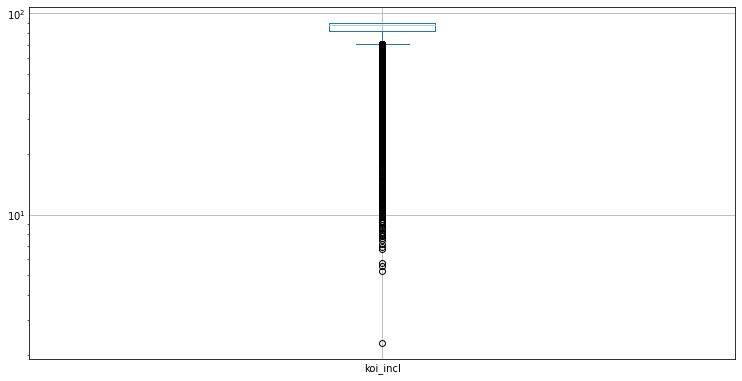

Valores NULOS: 0


In [387]:
# Atributo koi_incl com valores Outliers
print(df_exoplanets.koi_incl.describe())
print('Valores NULOS: ' + str(df_exoplanets.koi_incl.isna().sum()))
df_exoplanets.koi_incl.plot(kind='box',figsize=(10,5),logy=True)
plt.show()
# Inseridos Valores Médios
df_exoplanets.koi_incl.fillna(df_exoplanets.koi_incl.mean(), inplace=True)
print('Valores NULOS: ' + str(df_exoplanets.koi_incl.isna().sum()))
# Outliers mantidos por terem significado

#### Atributo koi_teq
#### Atributos com valores Outliers - Necessário tratamento

count     7250.000000
mean      1157.692552
std        903.870744
min         92.000000
25%        582.000000
50%        935.000000
75%       1486.000000
max      14667.000000
Name: koi_teq, dtype: float64
Valores NULOS: 258


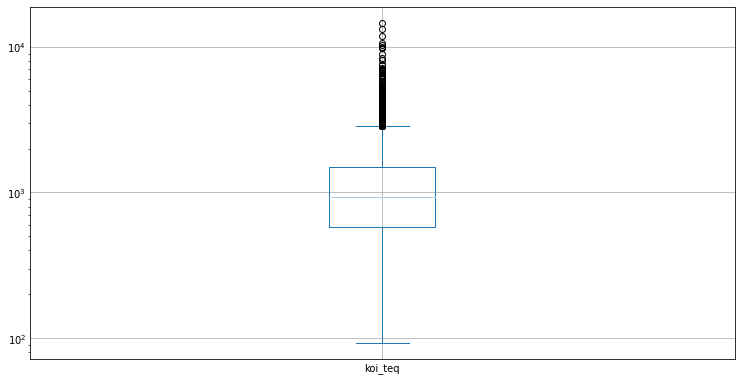

Valores NULOS: 0


In [388]:
# Atributo koi_teq com valores Outliers
print(df_exoplanets.koi_teq.describe())
print('Valores NULOS: ' + str(df_exoplanets.koi_teq.isna().sum()))
df_exoplanets.koi_teq.plot(kind='box',figsize=(10,5),logy=True)
plt.show()
# Inseridos Valores Médios
df_exoplanets.koi_teq.fillna(df_exoplanets.koi_teq.mean(), inplace=True)
print('Valores NULOS: ' + str(df_exoplanets.koi_teq.isna().sum()))
# Outliers mantidos por terem significado

Valores NULOS 1: 258
Valores NULOS 2: 258


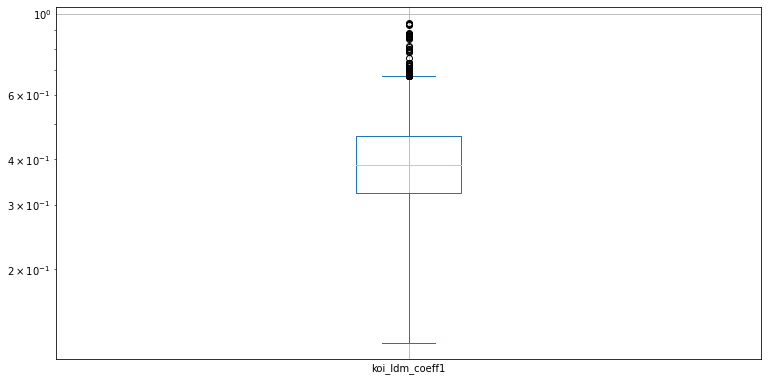

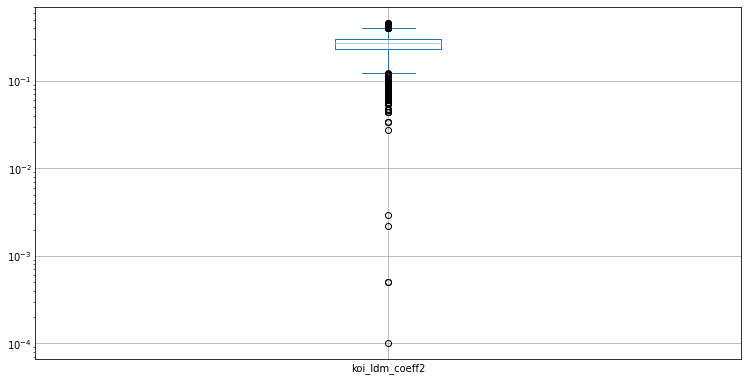

Valores NULOS 1: 0
Valores NULOS 2: 0


In [389]:
# Atributo koi_ldm_coeff1 e koi_ldm_coeff2 com valores Outliers
print('Valores NULOS 1: ' + str(df_exoplanets.koi_ldm_coeff1.isna().sum()))
print('Valores NULOS 2: ' + str(df_exoplanets.koi_ldm_coeff2.isna().sum()))
df_exoplanets.koi_ldm_coeff1.plot(kind='box',figsize=(10,5),logy=True)
plt.show()
df_exoplanets.koi_ldm_coeff2.plot(kind='box',figsize=(10,5),logy=True)
plt.show()
# Inseridos Valores Médios
df_exoplanets.koi_ldm_coeff1.fillna(df_exoplanets.koi_ldm_coeff1.mean(), inplace=True)
df_exoplanets.koi_ldm_coeff2.fillna(df_exoplanets.koi_ldm_coeff2.mean(), inplace=True)
print('Valores NULOS 1: ' + str(df_exoplanets.koi_ldm_coeff1.isna().sum()))
print('Valores NULOS 2: ' + str(df_exoplanets.koi_ldm_coeff2.isna().sum()))
# Outliers mantidos por terem significado

count     6827.000000
mean       215.829866
std        851.446303
min          2.538761
25%          4.230003
50%          6.257362
75%         27.319057
max      22982.162000
Name: koi_max_sngle_ev, dtype: float64
Valores NULOS: 681


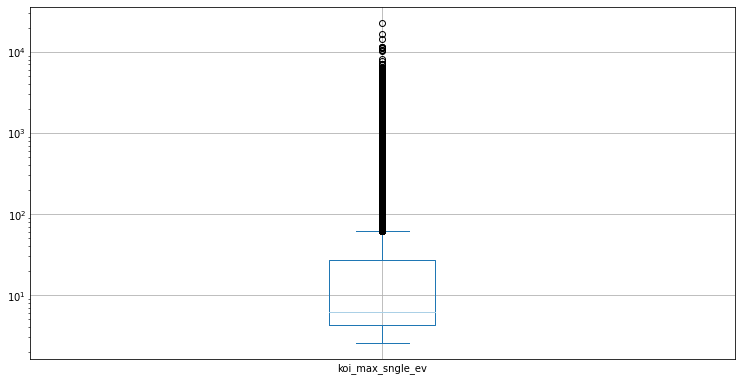

Valores NULOS: 0


In [390]:
# Atributo koi_max_sngle_ev com valores Outliers
print(df_exoplanets.koi_max_sngle_ev.describe())
print('Valores NULOS: ' + str(df_exoplanets.koi_max_sngle_ev.isna().sum()))
df_exoplanets.koi_max_sngle_ev.plot(kind='box',figsize=(10,5),logy=True)
plt.show()
# Inseridos Valores Médios
df_exoplanets.koi_max_sngle_ev.fillna(df_exoplanets.koi_max_sngle_ev.mean(), inplace=True)
print('Valores NULOS: ' + str(df_exoplanets.koi_max_sngle_ev.isna().sum()))
# Outliers mantidos por terem significado

count      6827.000000
mean       1256.308970
std        4582.831122
min           7.105086
25%          12.934684
50%          24.318182
75%         129.223915
max      120049.680000
Name: koi_max_mult_ev, dtype: float64
Valores NULOS: 681


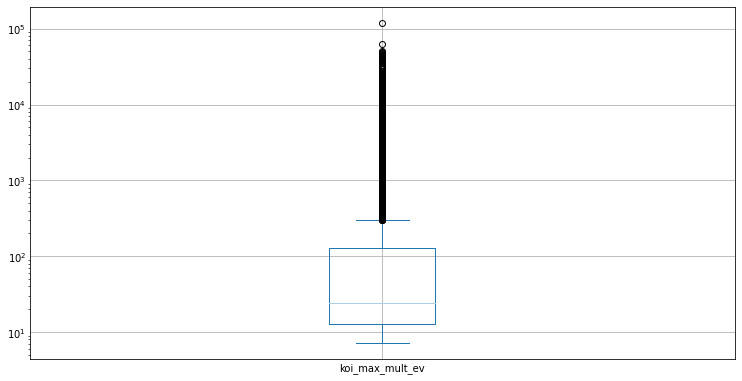

Valores NULOS: 0


In [391]:
# Atributo koi_max_mult_ev com valores Outliers
print(df_exoplanets.koi_max_mult_ev.describe())
print('Valores NULOS: ' + str(df_exoplanets.koi_max_mult_ev.isna().sum()))
df_exoplanets.koi_max_mult_ev.plot(kind='box',figsize=(10,5),logy=True)
plt.show()
# Inseridos Valores Médios
df_exoplanets.koi_max_mult_ev.fillna(df_exoplanets.koi_max_mult_ev.mean(), inplace=True)
print('Valores NULOS: ' + str(df_exoplanets.koi_max_mult_ev.isna().sum()))
# Outliers mantidos por terem significado

count    7250.000000
mean      321.512979
std       885.187587
min         0.000000
25%        15.400000
50%        30.800000
75%       117.000000
max      9054.700000
Name: koi_model_snr, dtype: float64
Valores NULOS: 258


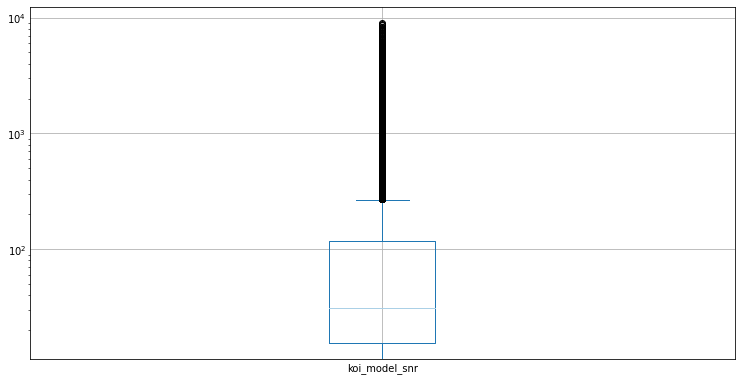

Valores NULOS: 0


In [392]:
# Atributo koi_model_snr com valores Outliers
print(df_exoplanets.koi_model_snr.describe())
print('Valores NULOS: ' + str(df_exoplanets.koi_model_snr.isna().sum()))
df_exoplanets.koi_model_snr.plot(kind='box',figsize=(10,5),logy=True)
plt.show()
# Inseridos Valores Médios
df_exoplanets.koi_model_snr.fillna(df_exoplanets.koi_model_snr.mean(), inplace=True)
print('Valores NULOS: ' + str(df_exoplanets.koi_model_snr.isna().sum()))
# Outliers mantidos por terem significado

count    6827.000000
mean      421.198770
std       570.590456
min         0.000000
25%        46.500000
50%       165.000000
75%       553.500000
max      2664.000000
Name: koi_num_transits, dtype: float64
Valores NULOS: 681


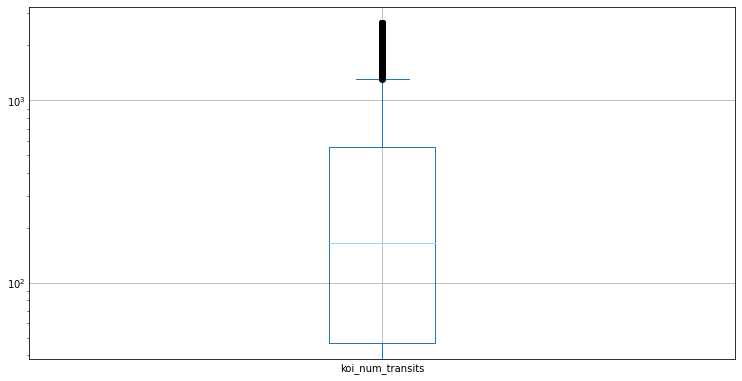

Valores NULOS: 0


In [393]:
# Atributo koi_num_transits com valores Outliers
print(df_exoplanets.koi_num_transits.describe())
print('Valores NULOS: ' + str(df_exoplanets.koi_num_transits.isna().sum()))
df_exoplanets.koi_num_transits.plot(kind='box',figsize=(10,5),logy=True)
plt.show()
# Inseridos Valores Médios
df_exoplanets.koi_num_transits.fillna(df_exoplanets.koi_num_transits.mean(), inplace=True)
print('Valores NULOS: ' + str(df_exoplanets.koi_num_transits.isna().sum()))
# Outliers mantidos por terem significado

count     7250.000000
mean      5718.807172
std        820.400723
min       2661.000000
25%       5317.250000
50%       5776.000000
75%       6119.000000
max      15896.000000
Name: koi_steff, dtype: float64
Valores NULOS: 258


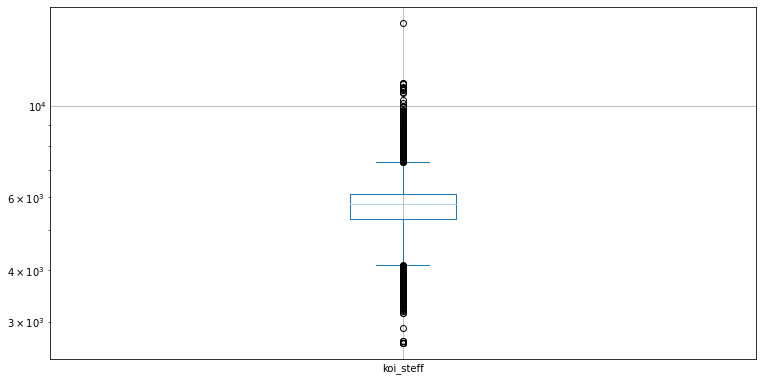

Valores NULOS: 0


In [394]:
# Atributo koi_steff com valores Outliers
print(df_exoplanets.koi_steff.describe())
print('Valores NULOS: ' + str(df_exoplanets.koi_steff.isna().sum()))
df_exoplanets.koi_steff.plot(kind='box',figsize=(10,5),logy=True)
plt.show()
# Inseridos Valores Médios
df_exoplanets.koi_steff.fillna(df_exoplanets.koi_steff.mean(), inplace=True)
print('Valores NULOS: ' + str(df_exoplanets.koi_steff.isna().sum()))
# Outliers mantidos por terem significado

count    7250.000000
mean        4.309946
std         0.438653
min         0.047000
25%         4.217000
50%         4.438000
75%         4.543000
max         5.283000
Name: koi_slogg, dtype: float64
Valores NULOS: 258


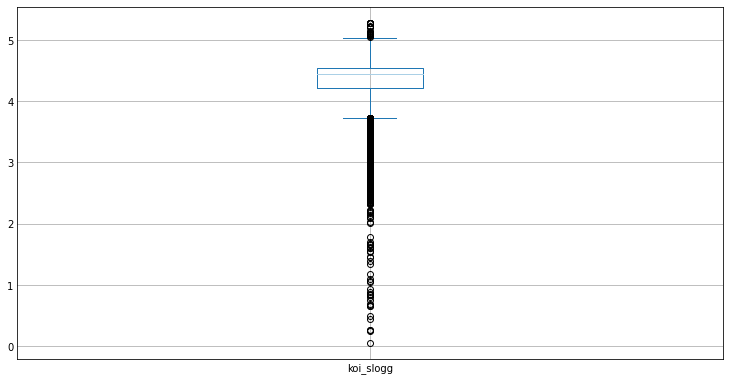

Valores NULOS: 0


In [395]:
# Atributo koi_slogg com valores Outliers
print(df_exoplanets.koi_slogg.describe())
print('Valores NULOS: ' + str(df_exoplanets.koi_slogg.isna().sum()))
df_exoplanets.koi_slogg.plot(kind='box',figsize=(10,5))
plt.show()
# Inseridos Valores Médios
df_exoplanets.koi_slogg.fillna(df_exoplanets.koi_slogg.mean(), inplace=True)
print('Valores NULOS: ' + str(df_exoplanets.koi_slogg.isna().sum()))
# Outliers mantidos por terem significado

count    7230.000000
mean       -0.129463
std         0.282253
min        -2.500000
25%        -0.260000
50%        -0.100000
75%         0.070000
max         0.560000
Name: koi_smet, dtype: float64
Valores NULOS: 278


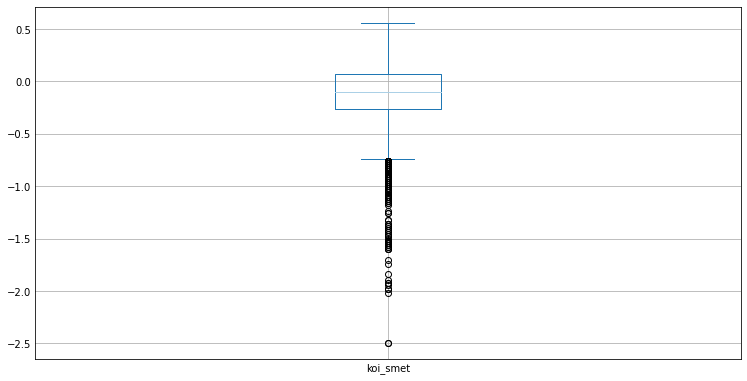

Valores NULOS: 0


In [396]:
# Atributo koi_smet com valores Outliers
print(df_exoplanets.koi_smet.describe())
print('Valores NULOS: ' + str(df_exoplanets.koi_smet.isna().sum()))
df_exoplanets.koi_smet.plot(kind='box',figsize=(10,5))
plt.show()
# Inseridos Valores Médios
df_exoplanets.koi_smet.fillna(df_exoplanets.koi_smet.mean(), inplace=True)
print('Valores NULOS: ' + str(df_exoplanets.koi_smet.isna().sum()))
# Outliers mantidos por terem significado

count    7250.000000
mean        1.759367
std         6.311392
min         0.116000
25%         0.829000
50%         1.000000
75%         1.349000
max       229.908000
Name: koi_srad, dtype: float64
Valores NULOS: 258


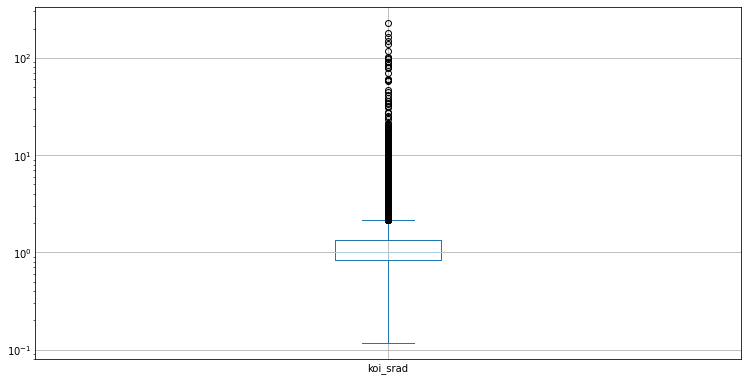

Valores NULOS: 0


In [397]:
# Atributo koi_srad com valores Outliers
print(df_exoplanets.koi_srad.describe())
print('Valores NULOS: ' + str(df_exoplanets.koi_srad.isna().sum()))
df_exoplanets.koi_srad.plot(kind='box',figsize=(10,5),logy=True)
plt.show()
# Inseridos Valores Médios
df_exoplanets.koi_srad.fillna(df_exoplanets.koi_srad.mean(), inplace=True)
print('Valores NULOS: ' + str(df_exoplanets.koi_srad.isna().sum()))
# Outliers mantidos por terem significado

count    7250.000000
mean        1.024015
std         0.354285
min         0.000000
25%         0.844000
50%         0.973000
75%         1.100000
max         3.735000
Name: koi_smass, dtype: float64
Valores NULOS: 258


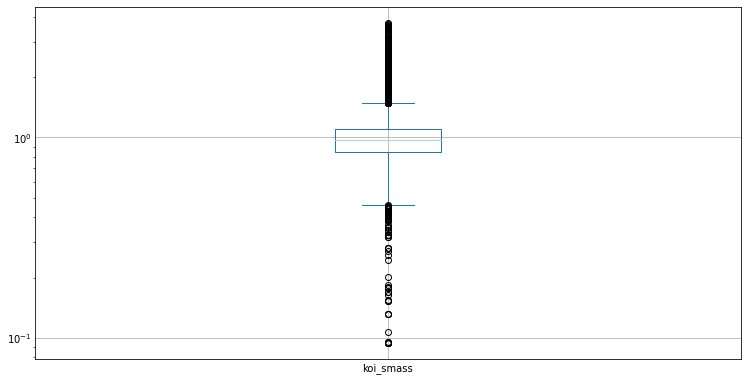

Valores NULOS: 0


In [398]:
# Atributo koi_smass com valores Outliers
print(df_exoplanets.koi_smass.describe())
print('Valores NULOS: ' + str(df_exoplanets.koi_smass.isna().sum()))
df_exoplanets.koi_smass.plot(kind='box',figsize=(10,5),logy=True)
plt.show()
# Inseridos Valores Médios
df_exoplanets.koi_smass.fillna(df_exoplanets.koi_smass.mean(), inplace=True)
print('Valores NULOS: ' + str(df_exoplanets.koi_smass.isna().sum()))
# Outliers mantidos por terem significado

count    7507.000000
mean       14.248763
std         1.402805
min         6.966000
25%        13.424000
50%        14.498000
75%        15.304500
max        20.003000
Name: koi_kepmag, dtype: float64
Valores NULOS: 1


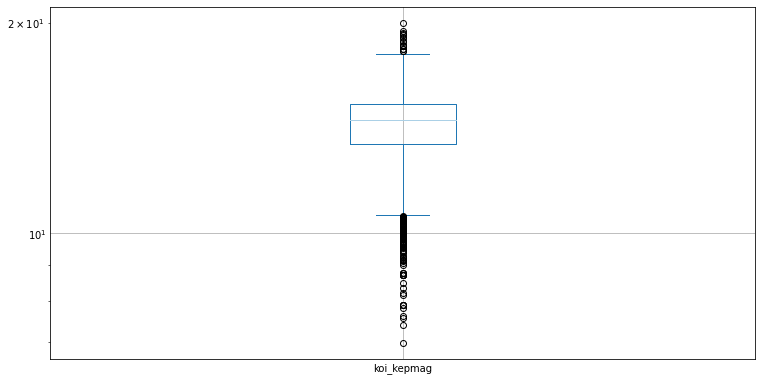

Valores NULOS: 0


In [399]:
# Atributo koi_kepmag com valores Outliers
print(df_exoplanets.koi_kepmag.describe())
print('Valores NULOS: ' + str(df_exoplanets.koi_kepmag.isna().sum()))
df_exoplanets.koi_kepmag.plot(kind='box',figsize=(10,5),logy=True)
plt.show()
# Inseridos Valores Médios
df_exoplanets.koi_kepmag.fillna(df_exoplanets.koi_kepmag.mean(), inplace=True)
print('Valores NULOS: ' + str(df_exoplanets.koi_kepmag.isna().sum()))
# Outliers mantidos por terem significado

count    7474.000000
mean       14.815195
std         1.519401
min         7.225000
25%        13.876000
50%        15.036500
75%        15.926000
max        21.150000
Name: koi_gmag, dtype: float64
Valores NULOS: 34


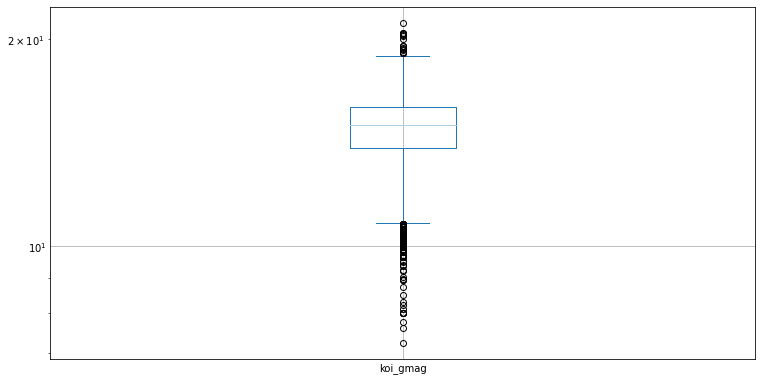

Valores NULOS: 0


In [400]:
# Atributo koi_gmag com valores Outliers
print(df_exoplanets.koi_gmag.describe())
print('Valores NULOS: ' + str(df_exoplanets.koi_gmag.isna().sum()))
df_exoplanets.koi_gmag.plot(kind='box',figsize=(10,5),logy=True)
plt.show()
# Inseridos Valores Médios
df_exoplanets.koi_gmag.fillna(df_exoplanets.koi_gmag.mean(), inplace=True)
print('Valores NULOS: ' + str(df_exoplanets.koi_gmag.isna().sum()))
# Outliers mantidos por terem significado

count    7501.000000
mean       14.206438
std         1.400502
min         7.101000
25%        13.374000
50%        14.448000
75%        15.258000
max        19.960000
Name: koi_rmag, dtype: float64
Valores NULOS: 7


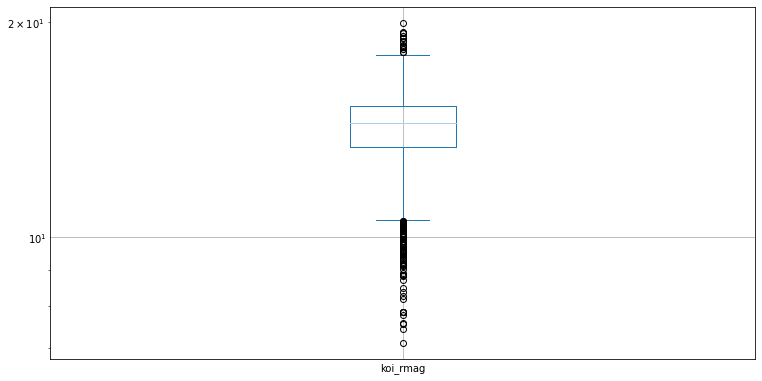

Valores NULOS: 0


In [401]:
# Atributo koi_rmag com valores Outliers
print(df_exoplanets.koi_rmag.describe())
print('Valores NULOS: ' + str(df_exoplanets.koi_rmag.isna().sum()))
df_exoplanets.koi_rmag.plot(kind='box',figsize=(10,5),logy=True)
plt.show()
# Inseridos Valores Médios
df_exoplanets.koi_rmag.fillna(df_exoplanets.koi_rmag.mean(), inplace=True)
print('Valores NULOS: ' + str(df_exoplanets.koi_rmag.isna().sum()))
# Outliers mantidos por terem significado

#### Atributo koi_imag
#### Valores completos com a média

count    7381.000000
mean       14.064495
std         1.306962
min         7.627000
25%        13.285000
50%        14.298000
75%        15.045000
max        19.900000
Name: koi_imag, dtype: float64
Valores NULOS: 127


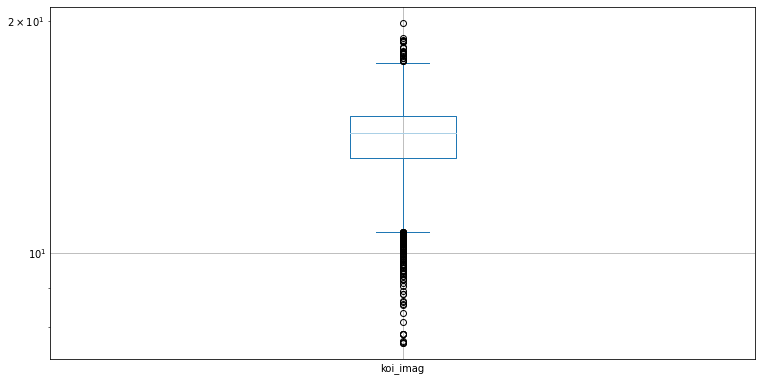

Valores NULOS: 0


In [402]:
# Atributo koi_imag com valores Outliers
print(df_exoplanets.koi_imag.describe())
print('Valores NULOS: ' + str(df_exoplanets.koi_imag.isna().sum()))
df_exoplanets.koi_imag.plot(kind='box',figsize=(10,5),logy=True)
plt.show()
# Inseridos Valores Médios
df_exoplanets.koi_imag.fillna(df_exoplanets.koi_imag.mean(), inplace=True)
print('Valores NULOS: ' + str(df_exoplanets.koi_imag.isna().sum()))
# Outliers mantidos por terem significado

count    6992.000000
mean       13.975821
std         1.236673
min         7.657000
25%        13.260000
50%        14.223000
75%        14.929250
max        17.403000
Name: koi_zmag, dtype: float64
Valores NULOS: 516


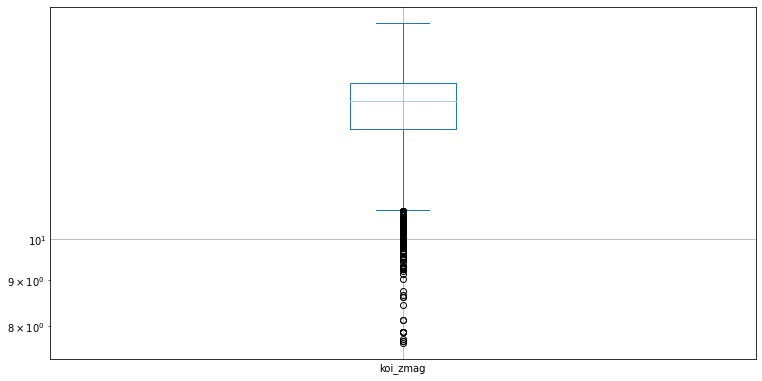

Valores NULOS: 0


In [403]:
# Atributo koi_zmag com valores Outliers
print(df_exoplanets.koi_zmag.describe())
print('Valores NULOS: ' + str(df_exoplanets.koi_zmag.isna().sum()))
df_exoplanets.koi_zmag.plot(kind='box',figsize=(10,5),logy=True)
plt.show()
# Inseridos Valores Médios
df_exoplanets.koi_zmag.fillna(df_exoplanets.koi_zmag.mean(), inplace=True)
print('Valores NULOS: ' + str(df_exoplanets.koi_zmag.isna().sum()))
# Outliers mantidos por terem significado

count    7483.000000
mean       12.979900
std         1.305649
min         5.431000
25%        12.250000
50%        13.203000
75%        13.960000
max        17.372000
Name: koi_jmag, dtype: float64
Valores NULOS: 25


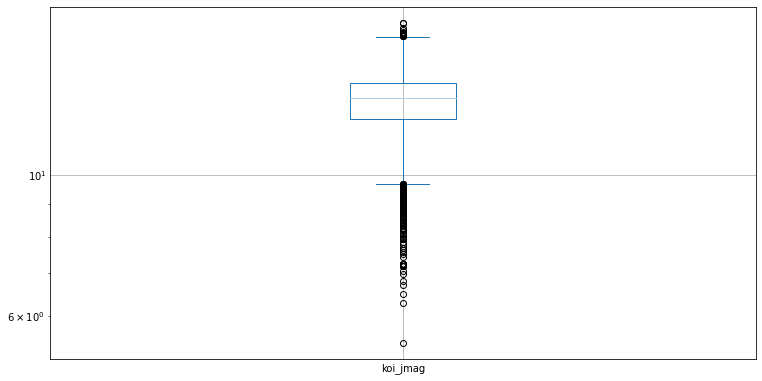

Valores NULOS: 0


In [404]:
# Atributo koi_jmag com valores Outliers
print(df_exoplanets.koi_jmag.describe())
print('Valores NULOS: ' + str(df_exoplanets.koi_jmag.isna().sum()))
df_exoplanets.koi_jmag.plot(kind='box',figsize=(10,5),logy=True)
plt.show()
# Inseridos Valores Médios
df_exoplanets.koi_jmag.fillna(df_exoplanets.koi_jmag.mean(), inplace=True)
print('Valores NULOS: ' + str(df_exoplanets.koi_jmag.isna().sum()))
# Outliers mantidos por terem significado

count    7483.000000
mean       12.607977
std         1.282287
min         5.054000
25%        11.913000
50%        12.808000
75%        13.544000
max        17.615000
Name: koi_hmag, dtype: float64
Valores NULOS: 25


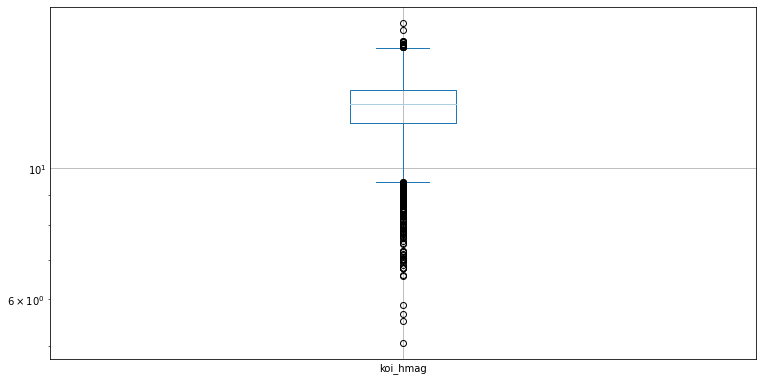

Valores NULOS: 0


In [405]:
# Atributo koi_hmag com valores Outliers
print(df_exoplanets.koi_hmag.describe())
print('Valores NULOS: ' + str(df_exoplanets.koi_hmag.isna().sum()))
df_exoplanets.koi_hmag.plot(kind='box',figsize=(10,5),logy=True)
plt.show()
# Inseridos Valores Médios
df_exoplanets.koi_hmag.fillna(df_exoplanets.koi_hmag.mean(), inplace=True)
print('Valores NULOS: ' + str(df_exoplanets.koi_hmag.isna().sum()))
# Outliers mantidos por terem significado

count    7483.000000
mean       12.530341
std         1.282013
min         4.941000
25%        11.840000
50%        12.721000
75%        13.477500
max        17.038000
Name: koi_kmag, dtype: float64
Valores NULOS: 25


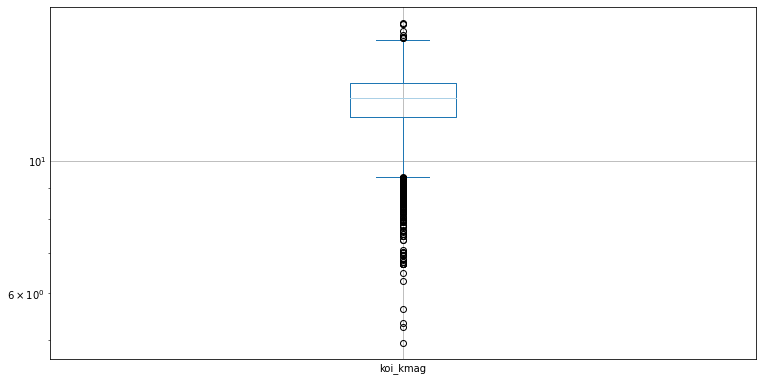

Valores NULOS: 0


In [406]:
# Atributo koi_kmag com valores Outliers
print(df_exoplanets.koi_kmag.describe())
print('Valores NULOS: ' + str(df_exoplanets.koi_kmag.isna().sum()))
df_exoplanets.koi_kmag.plot(kind='box',figsize=(10,5),logy=True)
plt.show()
# Inseridos Valores Médios
df_exoplanets.koi_kmag.fillna(df_exoplanets.koi_kmag.mean(), inplace=True)
print('Valores NULOS: ' + str(df_exoplanets.koi_kmag.isna().sum()))
# Outliers mantidos por terem significado

# 4. Análise e Exploração dos Dados

### 4.1 Categoria -> exoplanet_archive_information

<BarContainer object of 2 artists>

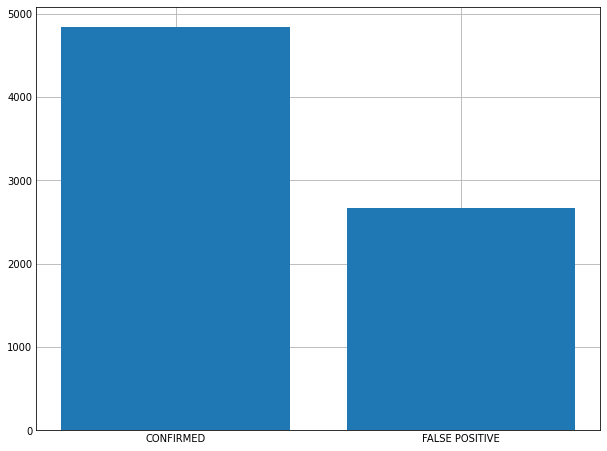

In [407]:
# Análise exploratória da Categoria exoplanet_archive_information
labels = df_exoplanets[exoplanet_archive_information[0]].unique()
qty = df_exoplanets[exoplanet_archive_information[0]].value_counts()

#Criação da imagem
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(labels,qty)

# Como o único atributo dessa categoria é categórico e será alterado apenas em outra fase do projeto não há insights vindo desses dados

### 4.2 Categoria -> project_disposition_columns

In [408]:
# Análise exploratória da Categoria exoplanet_archive_information
# Atributos presentes nessa categoria
project_disposition_columns

['koi_score',
 'koi_fpflag_nt',
 'koi_fpflag_ss',
 'koi_fpflag_co',
 'koi_fpflag_ec']

array([[<AxesSubplot: title={'center': 'koi_score'}>,
        <AxesSubplot: title={'center': 'koi_fpflag_nt'}>],
       [<AxesSubplot: title={'center': 'koi_fpflag_ss'}>,
        <AxesSubplot: title={'center': 'koi_fpflag_co'}>],
       [<AxesSubplot: title={'center': 'koi_fpflag_ec'}>,
        <AxesSubplot: >]], dtype=object)

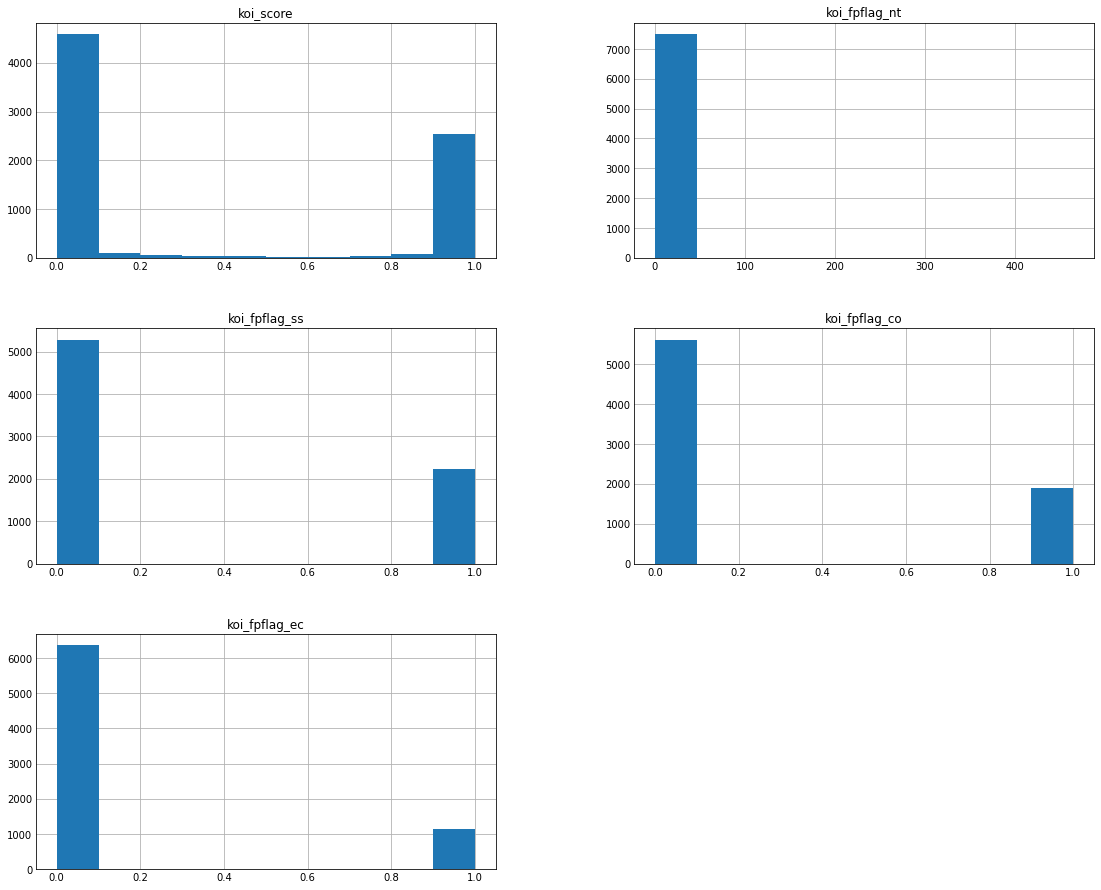

In [409]:
#Criação da imagem
df_exoplanets[project_disposition_columns[:]].hist(figsize=(15,12))

##### ATRIBUTO koi_score

In [410]:
# ATRIBUTO koi_score
# A value between 0 and 1 that indicates the confidence in the KOIdisposition.
# For CANDIDATEs, a higher value indicates more confidencein its disposition, 
# while for FALSE POSITIVEs, a higher value indicatesless confidence in that disposition. 
# The value is calculated from a MonteCarlo technique such that the score's value is equivalent to the frction ofiterations where the Robovetter yields a disposition of CANDIDATE.

# Inicialmente sem insights para esse atributo

##### ATRIBUTO koi_fpflag_net

count    7508.000000
mean        0.265583
std         5.379242
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       465.000000
Name: koi_fpflag_nt, dtype: float64


<AxesSubplot: >

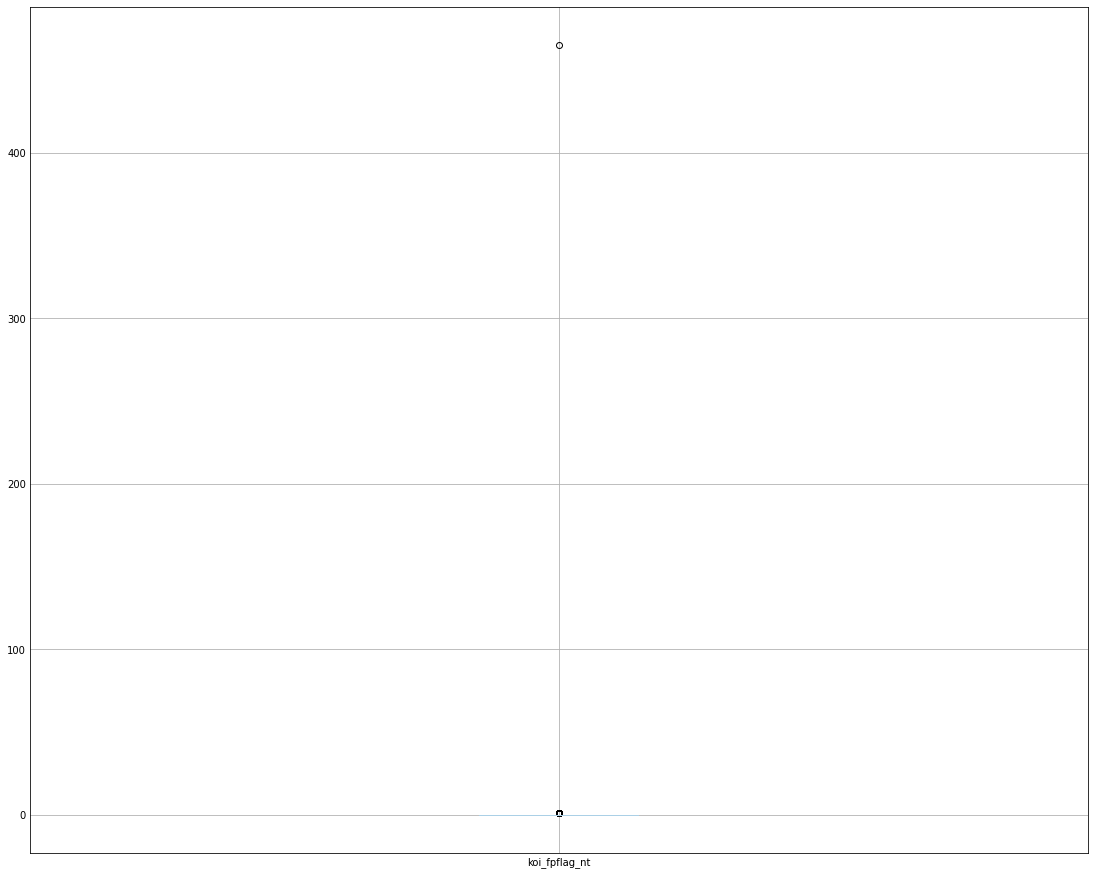

In [411]:
# ATRIBUTO koi_fpflag_nt
# A KOI whose light curve is not consistent with that of a transiting planet.
# This includes, but is not limited to, instrumental artifacts, non-eclipsingvariable stars, and spurious (very low SNR) detections.
print(df_exoplanets['koi_fpflag_nt'].describe())
df_exoplanets['koi_fpflag_nt'].plot(kind='box',figsize=(15,12))

In [423]:
print(df_exoplanets['koi_fpflag_nt'].count())
#df_exoplanets.drop(['koi_fpflag_nt'] == 465,axis=0,inplace=True)
print(df_exoplanets['koi_fpflag_nt'].count())

7508
7508


KeyError: False

### 4.3 Categoria -> transit_properties

### 4.4 Categoria -> tce_event_information

### 4.5 Categoria -> stellar_parameters

### 4.6 Categoria -> kic_parameters

# 5. Preparação dos Dados para os Modelos de Aprendizado

# 6. EXTRAS/TESTES

#### Verificando os tipos de dados dentro do dataframe temos somente o atributo Alvo como categórico
#### É necessário alterar os valores de falso positivo e confirmado para 0 e 1 respectivamente 

In [412]:
#df_exoplanets.koi_disposition

In [413]:
#le = preprocessing.LabelEncoder()
#le.fit(df_exoplanets.koi_disposition)

#y = le.transform(df_exoplanets.koi_disposition)

#X = df_exoplanets.iloc[:,1:(df_exoplanets.shape[1])]


In [414]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [415]:
#exoplanets_tree = DecisionTreeClassifier(random_state=0, criterion='entropy')
#exoplanets_tree = exoplanets_tree.fit(X_train, y_train)
#print("Acurácia (base de treinamento):", exoplanets_tree.score(X_train, y_train))